In [5]:
from qiskit import QuantumRegister, QuantumCircuit


def encoding(n=9):
    qreg = QuantumRegister(n)
    qc = QuantumCircuit(qreg)
    qc.cx(qreg[-1], qreg[-4])
    qc.cx(qreg[-1], qreg[-7])
    qc.barrier()
    qc.h(qreg[-1])
    qc.h(qreg[-4])
    qc.h(qreg[-7])
    qc.barrier()
    qc.cx(qreg[-1], qreg[-2])
    qc.cx(qreg[-1], qreg[-3])
    qc.cx(qreg[-4], qreg[-5])
    qc.cx(qreg[-4], qreg[-6])
    qc.cx(qreg[-7], qreg[-8])
    qc.cx(qreg[-7], qreg[-9])
    qc.barrier()
    return qc


def decoding(n=9):
    qreg = QuantumRegister(n)
    qc = QuantumCircuit(qreg)
    qc.cx(qreg[-1], qreg[-2])
    qc.cx(qreg[-1], qreg[-3])
    qc.ccx(qreg[-3], qreg[-2], qreg[-1])
    qc.barrier()
    qc.cx(qreg[-4], qreg[-5])
    qc.cx(qreg[-4], qreg[-6])
    qc.ccx(qreg[-6], qreg[-5], qreg[-4])
    qc.barrier()
    qc.cx(qreg[-7], qreg[-8])
    qc.cx(qreg[-7], qreg[-9])
    qc.ccx(qreg[-9], qreg[-8], qreg[-7])
    qc.barrier()
    qc.h(qreg[-1])
    qc.h(qreg[-4])
    qc.h(qreg[-7])
    qc.barrier()
    qc.cx(qreg[-1], qreg[-4])
    qc.cx(qreg[-1], qreg[-7])
    qc.ccx(qreg[-7], qreg[-4], qreg[-1])
    qc.barrier()
    return qc

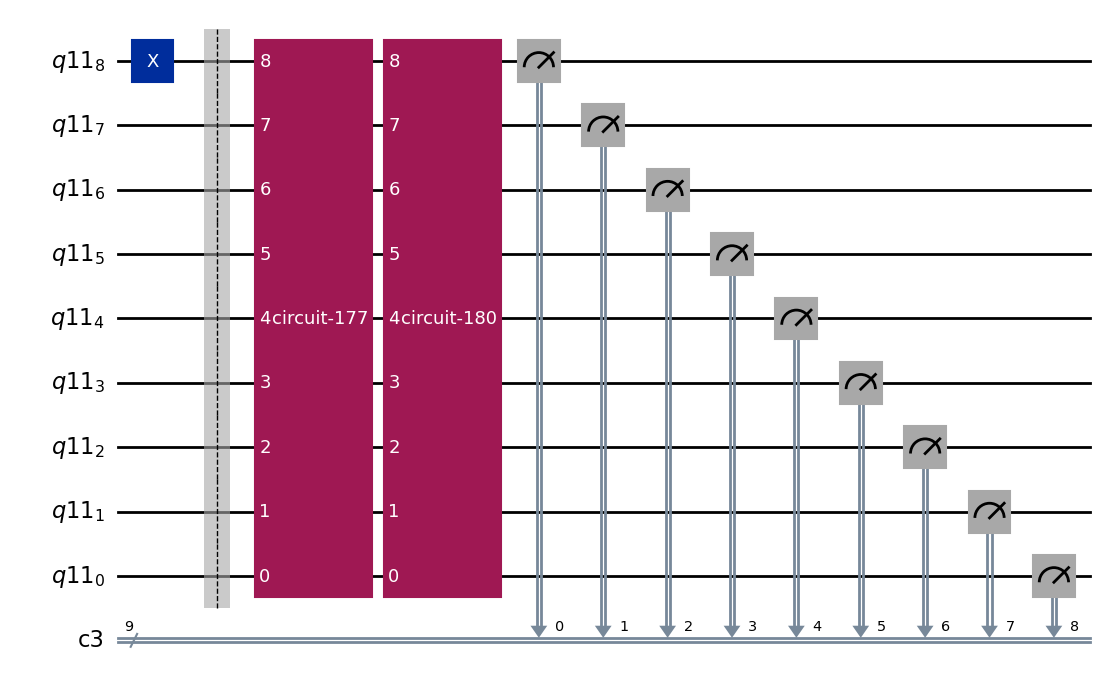

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qubits = 9
qreg = QuantumRegister(qubits)
state_reg = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, state_reg)

# note the order of the qubits are reversed in the qiskit
# initialize the state
qc.x(qreg[-1])
qc.barrier()
# apply encoding circuit
qc.append(encoding(), qreg)
# apply decoding circuit
qc.append(decoding(), qreg)
# measure the state
qc.measure(qreg[-1:-10:-1], state_reg)

qc.draw(output="mpl", reverse_bits=True, fold=-1)

In [9]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

simulator = AerSimulator()

# transpile the circuit
qc = transpile(qc, simulator)

# execute the circuit and read the results
job = simulator.run(qc, shots=512)

counts = job.result().get_counts()
for outcome in counts.keys():
    print(outcome[::-1], "is observed", counts[outcome], "times")

100000000 is observed 512 times
